In [ ]:
import os, gc, json, math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", 120)
plt.rcParams["figure.figsize"] = (8,5)

In [ ]:
PATH = "Taxi_Trips.csv"

df = pd.read_csv(PATH, nrows=None, low_memory=False)

RENAME = {
    "Trip Start Timestamp": "start_ts",
    "Trip End Timestamp": "end_ts",
    "Trip Seconds": "mins",
    "Trip Miles": "miles",
    "Pickup Community Area": "pickup_ca",
    "Dropoff Community Area": "dropoff_ca",
    "Fare": "fare",
    "Tips": "tips",
    "Tolls": "tolls",
    "Extras": "extras",
    "Trip Total": "total",
    "Payment Type": "payment",
    "Company": "company",
    "Pickup Centroid Latitude": "pickup_ct_lat",
    "Pickup Centroid Longitude": "pickup_ct_lon",
    "Dropoff Centroid Latitude": "dropoff_ct_lat",
    "Dropoff Centroid Longitude": "dropoff_ct_lon",
}
df = df.rename(columns=RENAME)

print(df.shape)
df.head(5)

(865247, 23)


,Trip ID,Taxi ID,start_ts,end_ts,mins,miles,Pickup Census Tract,Dropoff Census Tract,pickup_ca,dropoff_ca,fare,tips,tolls,extras,total,payment,company,pickup_ct_lat,pickup_ct_lon,Pickup Centroid Location,dropoff_ct_lat,dropoff_ct_lon,Dropoff Centroid Location
0,0287f53fedcde6b0af9aab9e32cbd2cadb337eaa,e54db25f18193a08f1f5754515e8c338480e04fb938ed3...,03/01/2024 12:00:00 AM,03/01/2024 12:00:00 AM,15.0,0.09,NaN,NaN,8.0,8.0,3.25,0.00,0.0,35.0,38.75,Credit Card,City Service,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
1,1f0034299b914fd7b45002568576a353c83acb2f,4a263f78f56815be4acd38658af8fc1824ce4e15f7ec81...,03/01/2024 12:00:00 AM,03/01/2024 12:15:00 AM,900.0,3.00,NaN,NaN,24.0,8.0,12.00,0.00,0.0,0.0,12.00,Cash,Taxi Affiliation Services,41.901207,-87.676356,POINT (-87.6763559892 41.9012069941),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
2,01a0b77b722a0b91f45cb4fc90b3e64f76fd0681,4f1e94982e6851725add382f7981d64006ae7c38f3664f...,03/01/2024 12:00:00 AM,03/01/2024 12:00:00 AM,711.0,5.84,NaN,NaN,56.0,NaN,16.75,4.45,0.0,5.0,26.70,Credit Card,City Service,41.792592,-87.769615,POINT (-87.7696154528 41.7925923603),NaN,NaN,NaN
3,14aff2071ac81c6450a8f8b0e1534497da900197,de8e8659ceb9eb0da842a46b60c0a5207098ac69fc23ab...,03/01/2024 12:00:00 AM,03/01/2024 12:30:00 AM,1770.0,13.36,NaN,NaN,76.0,3.0,34.75,7.85,0.0,4.0,47.10,Credit Card,Sun Taxi,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),41.965812,-87.655879,POINT (-87.6558787862 41.96581197)
4,16d3a633e2f380cee4a7fa4677db163b6e91255d,d79d3e19a1d5f6cb0cd4449d5579412262a2f1b182799d...,03/01/2024 12:00:00 AM,03/01/2024 12:15:00 AM,849.0,6.13,NaN,NaN,8.0,3.0,18.51,4.31,0.0,0.0,22.82,Mobile,5 Star Taxi,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.965812,-87.655879,POINT (-87.6558787862 41.96581197)


In [ ]:
df.isna().mean()

Trip ID                       0.000000
Taxi ID                       0.000001
start_ts                      0.000000
end_ts                        0.000009
mins                          0.000195
miles                         0.000007
Pickup Census Tract           0.621783
Dropoff Census Tract          0.637267
pickup_ca                     0.026807
dropoff_ca                    0.096912
fare                          0.002363
tips                          0.002363
tolls                         0.002363
extras                        0.002363
total                         0.002363
payment                       0.000000
company                       0.000000
pickup_ct_lat                 0.026543
pickup_ct_lon                 0.026543
Pickup Centroid Location      0.026543
dropoff_ct_lat                0.092084
dropoff_ct_lon                0.092084
Dropoff Centroid  Location    0.092084
dtype: float64

In [ ]:
pip uninstall certifi geopandas pyogrio pyproj shapely -y

Found existing installation: certifi 2025.10.5
Note: you may need to restart the kernel to use updated packages.


error: uninstall-no-record-file

× Cannot uninstall certifi 2025.10.5
╰─> The package's contents are unknown: no RECORD file was found for certifi.

hint: You might be able to recover from this via: pip install --force-reinstall --no-deps certifi==2025.10.5


In [ ]:
import folium
from shapely import wkt
import pandas as pd

# Get value counts
value_counts = df['Dropoff Centroid  Location'].value_counts()

# Create base map centered on Chicago
m = folium.Map(location=[41.8781, -87.6298], zoom_start=11)

# Add top 200 locations (adjust as needed)
for point_str, count in value_counts.head(200).items():
    point = wkt.loads(point_str)

    # Color based on frequency
    if count > 50000:
        color = 'red'
    elif count > 10000:
        color = 'orange'
    else:
        color = 'blue'

    folium.CircleMarker(
        location=[point.y, point.x],
        radius=min(count/5000, 20),
        popup=f'<b>Dropoffs:</b> {count:,}<br><b>Location:</b> ({point.y:.4f}, {point.x:.4f})',
        tooltip=f'{count:,} dropoffs',
        color=color,
        fill=True,
        fillOpacity=0.7
    ).add_to(m)

# Save and display
m.save('chicago_dropoffs.html')
print("✅ Interactive map saved to chicago_dropoffs.html")
print(f"Total unique locations: {len(value_counts)}")
print(f"Total dropoffs: {value_counts.sum():,}")
print(f"\nTop 10 busiest locations:")
print(value_counts.head(10))

✅ Interactive map saved to chicago_dropoffs.html
Total unique locations: 441
Total dropoffs: 785,572

Top 10 busiest locations:
Dropoff Centroid  Location
POINT (-87.6333080367 41.899602111)     80677
POINT (-87.6327464887 41.8809944707)    51348
POINT (-87.6559981815 41.9442266014)    37105
POINT (-87.6635175498 41.874005383)     36245
POINT (-87.6209929134 41.8849871918)    35256
POINT (-87.6251921424 41.8788655841)    32759
POINT (-87.6494887289 41.9226862843)    29522
POINT (-87.9030396611 41.9790708201)    21268
POINT (-87.6763559892 41.9012069941)    20511
POINT (-87.642648998 41.8792550844)     18964
Name: count, dtype: int64


In [ ]:
from sklearn.cluster import KMeans
from shapely import wkt
import numpy as np

# Extract coordinates from your location column
def extract_coords(point_str):
    point = wkt.loads(point_str)
    return [point.x, point.y]

# Get coordinates for all rows
coords = np.array(df['Dropoff Centroid  Location'].apply(extract_coords).tolist())

# Create location clusters (adjust n_clusters based on your needs)
kmeans = KMeans(n_clusters=20, random_state=42)
df['dropoff_cluster'] = kmeans.fit_predict(coords)

# Now you can use 'dropoff_cluster' as a categorical feature in causal ML
print(df['dropoff_cluster'].value_counts())

TypeError: Expected bytes or string, got float

In [ ]:
for tcol in ["start_ts","end_ts"]:
    df[tcol] = pd.to_datetime(df[tcol], format="%m/%d/%Y %I:%M:%S %p", errors="coerce")

df["mins"] = df["mins"] / 60.0

for c in ["miles","mins","fare","tips","tolls","extras","total"]:
    df[c] = pd.to_numeric(df[c], errors="coerce")

df["fare_per_mile"] = np.where((df["fare"].notna()) & (df["miles"]>0), df["fare"]/df["miles"], np.nan)
df["tip_rate"] = np.where((df["tips"].notna()) & (df["fare"]>0), df["tips"]/df["fare"], np.nan)
df["mph"] = df["miles"] / (df["mins"]/60.0)

df["date"] = df["start_ts"].dt.date
df["ymd"] = df["start_ts"].dt.to_period("D").astype(str)
df["dow"] = df["start_ts"].dt.dayofweek
df["hour"] = df["start_ts"].dt.hour
df["ts_hr"] = df["start_ts"].dt.floor("h")

df.describe()

,start_ts,end_ts,mins,miles,Pickup Census Tract,Dropoff Census Tract,pickup_ca,dropoff_ca,fare,tips,tolls,extras,total,pickup_ct_lat,pickup_ct_lon,dropoff_ct_lat,dropoff_ct_lon,fare_per_mile,tip_rate,mph,dow,hour,ts_hr
count,865247,865239,865078.000000,865241.000000,3.272510e+05,3.138540e+05,842052.000000,781394.000000,863202.000000,863202.000000,863202.000000,863202.000000,863202.000000,842281.000000,842281.000000,785572.000000,785572.000000,776530.000000,861686.000000,8.493700e+05,865247.000000,865247.000000,865247
mean,2024-02-01 12:23:29.324273664,2024-02-01 12:43:04.648750336,19.175534,6.563330,1.703152e+10,1.703141e+10,36.660485,25.853590,22.057441,2.761349,0.063232,2.149285,27.204886,41.902214,-87.704695,41.892124,-87.659592,12.073185,0.149826,inf,2.685883,13.781852,2024-02-01 12:00:59.439211520
min,2024-01-01 00:00:00,2024-01-01 00:00:00,0.000000,0.000000,1.703101e+10,1.703101e+10,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.660136,-87.913625,41.650222,-87.913625,0.000000,0.000000,0.000000e+00,0.000000,0.000000,2024-01-01 00:00:00
25%,2024-01-18 11:30:00,2024-01-18 11:45:00,7.650000,0.910000,1.703108e+10,1.703108e+10,8.000000,8.000000,8.000000,0.000000,0.000000,0.000000,10.000000,41.878866,-87.769615,41.878866,-87.663518,2.632899,0.000000,8.571429e+00,1.000000,10.000000,2024-01-18 11:00:00
50%,2024-02-01 13:30:00,2024-02-01 13:45:00,15.000000,3.070000,1.703132e+10,1.703132e+10,32.000000,28.000000,15.750000,0.000000,0.000000,0.000000,18.780000,41.898332,-87.642649,41.892508,-87.633308,3.437500,0.000000,1.425974e+01,3.000000,14.000000,2024-02-01 13:00:00
75%,2024-02-16 12:00:00,2024-02-16 12:15:00,26.516667,11.710000,1.703198e+10,1.703184e+10,69.000000,32.000000,33.750000,4.000000,0.000000,3.000000,40.900000,41.979071,-87.626146,41.922686,-87.625192,5.921053,0.232184,2.697267e+01,4.000000,18.000000,2024-02-16 12:00:00
max,2024-03-01 00:00:00,2024-03-02 10:15:00,1439.000000,3093.470000,1.703198e+10,1.703198e+10,77.000000,77.000000,9999.750000,200.000000,4444.440000,5051.100000,9999.750000,42.021224,-87.534903,42.021224,-87.534903,100000.000000,1365.000000,inf,6.000000,23.000000,2024-03-01 00:00:00
std,NaN,NaN,26.404059,8.279528,3.721479e+05,3.392339e+05,26.416845,20.501911,25.145823,4.132953,12.955213,19.319780,40.989308,0.066429,0.115525,0.059498,0.067986,165.569629,2.881969,NaN,1.850553,5.106684,NaN


In [ ]:
df = df[(df["miles"]>0) & (df["miles"]<200) & (df["mins"]>0) & (df["mins"]<600)]
df = df[(df["total"]>0) & (df["total"]<1000)]
df = df[(df["mph"] >= 5) & (df["mph"] <= 80)]

print(df.shape)
df.describe(percentiles=[.1,.5,.9,.95,.99])

(724483, 31)


,start_ts,end_ts,mins,miles,Pickup Census Tract,Dropoff Census Tract,pickup_ca,dropoff_ca,fare,tips,tolls,extras,total,pickup_ct_lat,pickup_ct_lon,dropoff_ct_lat,dropoff_ct_lon,fare_per_mile,tip_rate,mph,dow,hour,ts_hr
count,724483,724483,724483.000000,724483.000000,2.739620e+05,2.628660e+05,709689.000000,656677.00000,724483.000000,724483.000000,724483.000000,724483.000000,724483.000000,709727.000000,709727.000000,660285.000000,660285.000000,724483.000000,724480.000000,724483.000000,724483.000000,724483.000000,724483
mean,2024-02-01 14:47:12.895043328,2024-02-01 15:06:50.791005184,19.604981,7.731286,1.703152e+10,1.703140e+10,37.159281,25.27313,22.631858,2.886694,0.022982,2.046372,27.785036,41.903161,-87.706970,41.891888,-87.657271,7.126306,0.151183,20.796958,2.678721,13.760945,2024-02-01 14:24:43.050948352
min,2024-01-01 00:00:00,2024-01-01 00:00:00,0.016667,0.010000,1.703101e+10,1.703101e+10,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.010000,41.660136,-87.913625,41.650222,-87.913625,0.000000,0.000000,5.000000,0.000000,0.000000,2024-01-01 00:00:00
10%,2024-01-08 13:30:00,2024-01-08 13:45:00,5.166667,0.820000,1.703108e+10,1.703108e+10,8.000000,6.00000,6.000000,0.000000,0.000000,0.000000,7.250000,41.809018,-87.913625,41.812949,-87.711211,2.495722,0.000000,8.138052,0.000000,7.000000,2024-01-08 13:00:00
50%,2024-02-01 15:30:00,2024-02-01 15:45:00,16.233333,5.410000,1.703132e+10,1.703132e+10,32.000000,28.00000,17.500000,1.110000,0.000000,0.000000,20.250000,41.898332,-87.642649,41.892508,-87.633308,3.232323,0.110659,17.623256,3.000000,14.000000,2024-02-01 15:00:00
90%,2024-02-24 18:00:00,2024-02-24 18:30:00,38.150000,17.510000,1.703198e+10,1.703184e+10,76.000000,56.00000,44.250000,9.400000,0.000000,5.000000,57.530000,41.980264,-87.619711,41.975171,-87.618868,7.575758,0.324324,38.968373,5.000000,20.000000,2024-02-24 18:00:00
95%,2024-02-27 17:00:00,2024-02-27 17:30:00,46.000000,18.450000,1.703198e+10,1.703198e+10,76.000000,76.00000,47.500000,10.450000,0.000000,6.000000,63.250000,41.980264,-87.617358,41.982775,-87.615970,9.500000,0.411879,44.188053,6.000000,22.000000,2024-02-27 17:00:00
99%,2024-02-29 15:30:00,2024-02-29 15:45:00,62.766667,27.250000,1.703198e+10,1.703198e+10,77.000000,77.00000,70.450000,15.120000,0.000000,30.500000,96.900000,42.001571,-87.572782,42.005560,-87.572782,21.667495,0.666667,52.354571,6.000000,23.000000,2024-02-29 15:00:00
max,2024-03-01 00:00:00,2024-03-01 00:30:00,540.100000,198.450000,1.703198e+10,1.703198e+10,77.000000,77.00000,764.500000,200.000000,99.000000,342.420000,764.500000,42.021224,-87.534903,42.021224,-87.534903,22000.000000,1365.000000,80.000000,6.000000,23.000000,2024-03-01 00:00:00
std,NaN,NaN,14.422777,7.116511,3.712944e+05,3.332670e+05,26.584924,20.01939,16.844395,4.110339,0.534334,5.553617,22.440290,0.066374,0.117371,0.058882,0.064488,92.173035,3.136104,12.093105,1.847373,5.073650,NaN


In [ ]:
hourly = (df.groupby("ts_hr")
         .agg(n_trips=("miles","size"),
              mean_fare_per_mile=("fare_per_mile","mean"),
              p90_fare_per_mile=("fare_per_mile", lambda x: np.nanpercentile(x,90)),
              mean_mph=("mph","mean"))
         .reset_index())

print(hourly.shape)
hourly

(1441, 5)


,ts_hr,n_trips,mean_fare_per_mile,p90_fare_per_mile,mean_mph
0,2024-01-01 00:00:00,311,44.432702,12.987013,20.833276
1,2024-01-01 01:00:00,384,26.423731,16.524966,16.434857
2,2024-01-01 02:00:00,357,95.335790,21.118611,18.457724
3,2024-01-01 03:00:00,183,10.234165,9.742754,19.477639
4,2024-01-01 04:00:00,92,17.587575,9.054487,21.565001
...,...,...,...,...,...
1436,2024-02-29 20:00:00,859,12.373914,6.111111,23.154772
1437,2024-02-29 21:00:00,576,16.684520,6.554598,25.834912
1438,2024-02-29 22:00:00,462,13.734814,7.284722,26.939331
1439,2024-02-29 23:00:00,354,13.745055,5.767045,29.285193


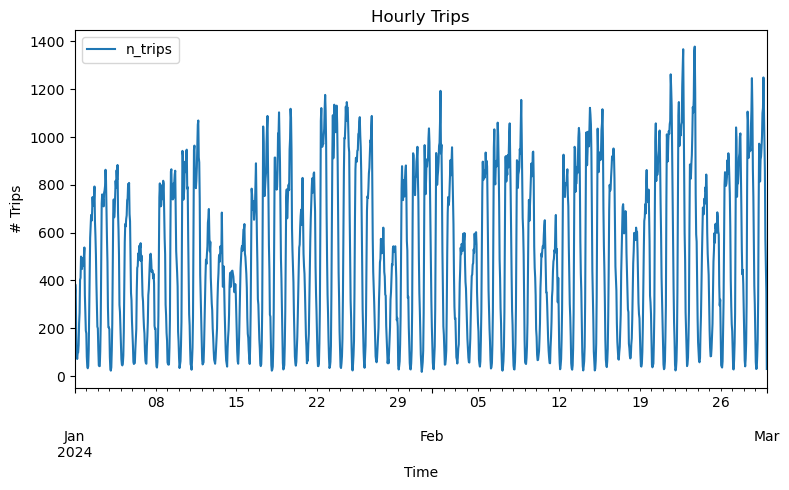

In [ ]:
hourly.plot(x="ts_hr", y="n_trips", title="Hourly Trips")
plt.xlabel("Time")
plt.ylabel("# Trips")
plt.tight_layout()
plt.show()

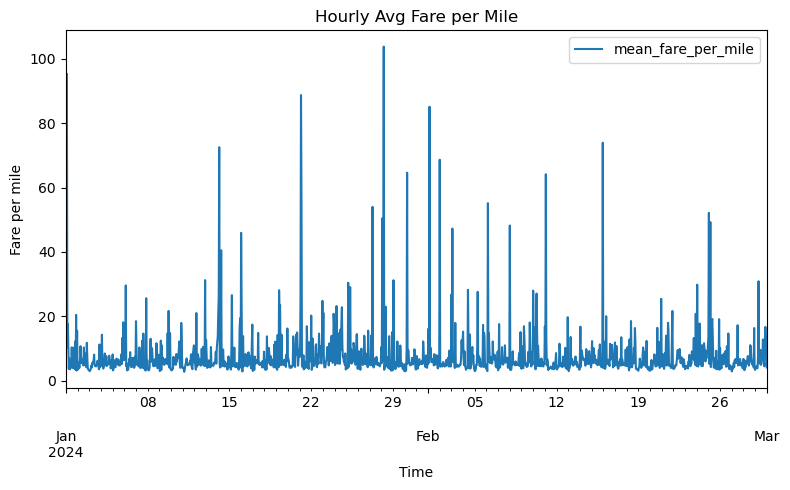

In [ ]:
bbplt.xlabel("Time")
plt.ylabel("Fare per mile")
plt.tight_layout()
plt.show()

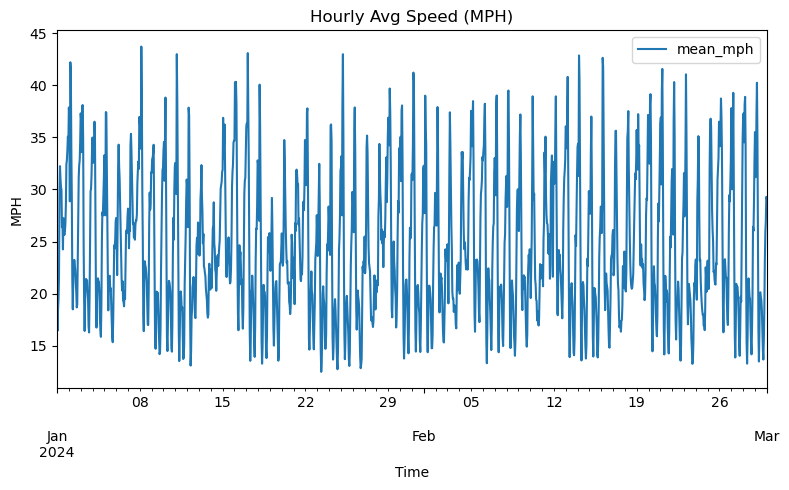

In [ ]:
hourly.plot(x="ts_hr", y="mean_mph", title="Hourly Avg Speed (MPH)")
plt.xlabel("Time"); plt.ylabel("MPH")
plt.tight_layout(); plt.show()

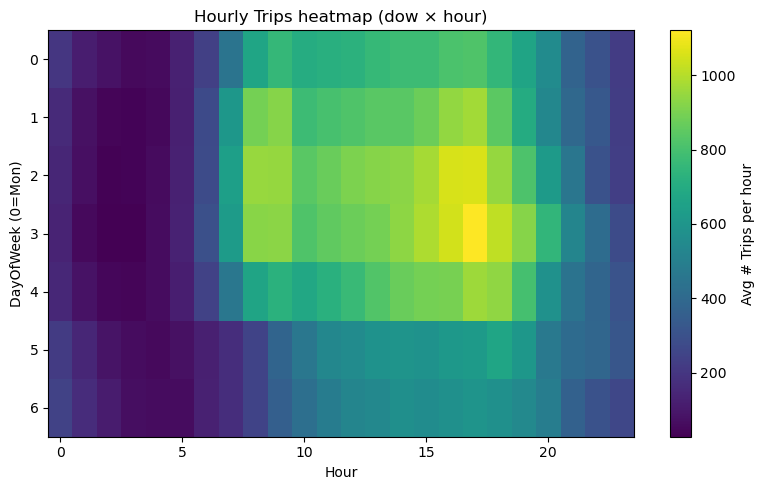

In [ ]:
hourly["dow"]  = hourly["ts_hr"].dt.dayofweek  # 0=Mon
hourly["hour"] = hourly["ts_hr"].dt.hour

pv_hr = (hourly
         .groupby(["dow","hour"])
         .agg(n_trips=("n_trips","mean"),
              fare_per_mile=("mean_fare_per_mile","mean"),
              mph=("mean_mph","mean"))
         .reset_index())

mat = pv_hr.pivot(index="dow", columns="hour", values="n_trips").fillna(0)

plt.imshow(mat, aspect="auto")
plt.title("Hourly Trips heatmap (dow × hour)")
plt.xlabel("Hour"); plt.ylabel("DayOfWeek (0=Mon)")
plt.colorbar(label="Avg # Trips per hour")
plt.tight_layout(); plt.show()

In [ ]:
df["is_weekday"] = df["dow"].between(0, 4).astype(int)
df["rush_hour"] = (
    df["is_weekday"].eq(1) &
    (
        df["hour"].between(7, 9) |
        df["hour"].between(16, 18)
    )
).astype(int)

df["rush_hour"].value_counts(normalize=True)

rush_hour
0    0.691456
1    0.308544
Name: proportion, dtype: float64

In [ ]:
df

,Trip ID,Taxi ID,start_ts,end_ts,mins,miles,Pickup Census Tract,Dropoff Census Tract,pickup_ca,dropoff_ca,fare,tips,tolls,extras,total,payment,company,pickup_ct_lat,pickup_ct_lon,Pickup Centroid Location,dropoff_ct_lat,dropoff_ct_lon,Dropoff Centroid Location,fare_per_mile,tip_rate,mph,date,ymd,dow,hour,ts_hr,is_weekday,rush_hour
0,0287f53fedcde6b0af9aab9e32cbd2cadb337eaa,e54db25f18193a08f1f5754515e8c338480e04fb938ed3...,2024-03-01,2024-03-01 00:00:00,0.250000,0.09,NaN,NaN,8.0,8.0,3.25,0.00,0.0,35.0,38.75,Credit Card,City Service,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.899602,-87.633308,POINT (-87.6333080367 41.899602111),36.111111,0.000000,21.600000,2024-03-01,2024-03-01,4,0,2024-03-01,1,0
1,1f0034299b914fd7b45002568576a353c83acb2f,4a263f78f56815be4acd38658af8fc1824ce4e15f7ec81...,2024-03-01,2024-03-01 00:15:00,15.000000,3.00,NaN,NaN,24.0,8.0,12.00,0.00,0.0,0.0,12.00,Cash,Taxi Affiliation Services,41.901207,-87.676356,POINT (-87.6763559892 41.9012069941),41.899602,-87.633308,POINT (-87.6333080367 41.899602111),4.000000,0.000000,12.000000,2024-03-01,2024-03-01,4,0,2024-03-01,1,0
2,01a0b77b722a0b91f45cb4fc90b3e64f76fd0681,4f1e94982e6851725add382f7981d64006ae7c38f3664f...,2024-03-01,2024-03-01 00:00:00,11.850000,5.84,NaN,NaN,56.0,NaN,16.75,4.45,0.0,5.0,26.70,Credit Card,City Service,41.792592,-87.769615,POINT (-87.7696154528 41.7925923603),NaN,NaN,NaN,2.868151,0.265672,29.569620,2024-03-01,2024-03-01,4,0,2024-03-01,1,0
3,14aff2071ac81c6450a8f8b0e1534497da900197,de8e8659ceb9eb0da842a46b60c0a5207098ac69fc23ab...,2024-03-01,2024-03-01 00:30:00,29.500000,13.36,NaN,NaN,76.0,3.0,34.75,7.85,0.0,4.0,47.10,Credit Card,Sun Taxi,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),41.965812,-87.655879,POINT (-87.6558787862 41.96581197),2.601048,0.225899,27.172881,2024-03-01,2024-03-01,4,0,2024-03-01,1,0
4,16d3a633e2f380cee4a7fa4677db163b6e91255d,d79d3e19a1d5f6cb0cd4449d5579412262a2f1b182799d...,2024-03-01,2024-03-01 00:15:00,14.150000,6.13,NaN,NaN,8.0,3.0,18.51,4.31,0.0,0.0,22.82,Mobile,5 Star Taxi,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.965812,-87.655879,POINT (-87.6558787862 41.96581197),3.019576,0.232847,25.992933,2024-03-01,2024-03-01,4,0,2024-03-01,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865242,9e8e52afb83340357ee83796469162c7d8774099,bb277fc77c865565c0fc305dcad0c6b6633e72ce0fcfac...,2024-01-01,2024-01-01 00:00:00,5.783333,1.17,NaN,NaN,6.0,7.0,6.25,0.00,0.0,0.0,6.25,Cash,Chicago Independents,41.944227,-87.655998,POINT (-87.6559981815 41.9442266014),41.922686,-87.649489,POINT (-87.6494887289 41.9226862843),5.341880,0.000000,12.138329,2024-01-01,2024-01-01,0,0,2024-01-01,1,0
865243,ea3edb137b267a462a73c53fa2e354f60746560e,931225a382fc38a75212f9d358439aec0d9b50fdaf32ad...,2024-01-01,2024-01-01 00:15:00,19.883333,10.58,NaN,NaN,56.0,28.0,28.00,4.00,0.0,6.0,38.50,Credit Card,Flash Cab,41.792592,-87.769615,POINT (-87.7696154528 41.7925923603),41.874005,-87.663518,POINT (-87.6635175498 41.874005383),2.646503,0.142857,31.926236,2024-01-01,2024-01-01,0,0,2024-01-01,1,0
865244,ddcd4d6b7c138bee6841a7800cfbb45f31e6101a,0fdab9be71f6d88e3d3a2e115afc5a33d2bf74153792c5...,2024-01-01,2024-01-01 00:45:00,50.983333,17.44,1.703198e+10,1.703132e+10,76.0,32.0,50.75,11.05,0.0,4.0,66.30,Credit Card,City Service,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),41.884987,-87.620993,POINT (-87.6209929134 41.8849871918),2.909977,0.217734,20.524354,2024-01-01,2024-01-01,0,0,2024-01-01,1,0
865245,bdc420394ce5e864465df0a361dfbe95a4e228c4,389f01c14b097ed951468ff163ccc71ebcb99a27e523e9...,2024-01-01,2024-01-01 00:30:00,22.816667,3.07,NaN,NaN,8.0,24.0,14.50,10.00,0.0,1.0,26.00,Mobile,Medallion Leasin,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.901207,-87.676356,POINT (-87.6763559892 41.9012069941),4.723127,0.689655,8.073046,2024-01-01,2024-01-01,0,0,2024-01-01,1,0


In [ ]:
def is_ord(lat, lon):
    return (lat.between(41.96, 42.01)) & (lon.between(-87.95, -87.85))

def is_mdw(lat, lon):
    return (lat.between(41.76, 41.81)) & (lon.between(-87.78, -87.71))

pickup_ord = is_ord(df["pickup_ct_lat"], df["pickup_ct_lon"])
dropoff_ord = is_ord(df["dropoff_ct_lat"], df["dropoff_ct_lon"])
pickup_mdw = is_mdw(df["pickup_ct_lat"], df["pickup_ct_lon"])
dropoff_mdw = is_mdw(df["dropoff_ct_lat"], df["dropoff_ct_lon"])

df["airport_trip"] = (
    pickup_ord | dropoff_ord | pickup_mdw | dropoff_mdw
).astype(int)

df["airport_trip"].value_counts(normalize=True)

airport_trip
0    0.698989
1    0.301011
Name: proportion, dtype: float64

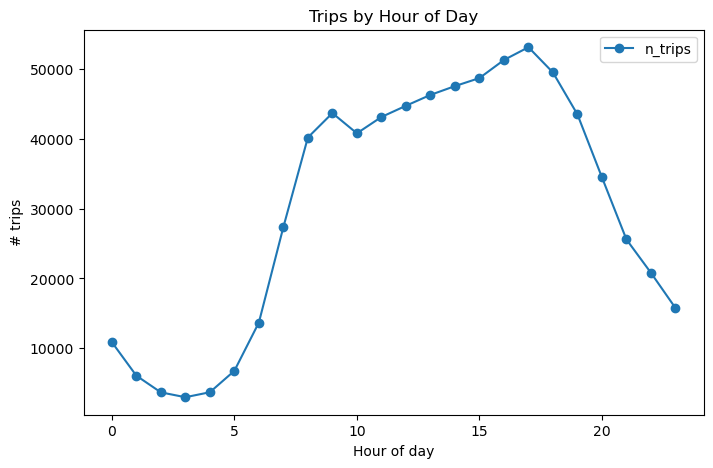

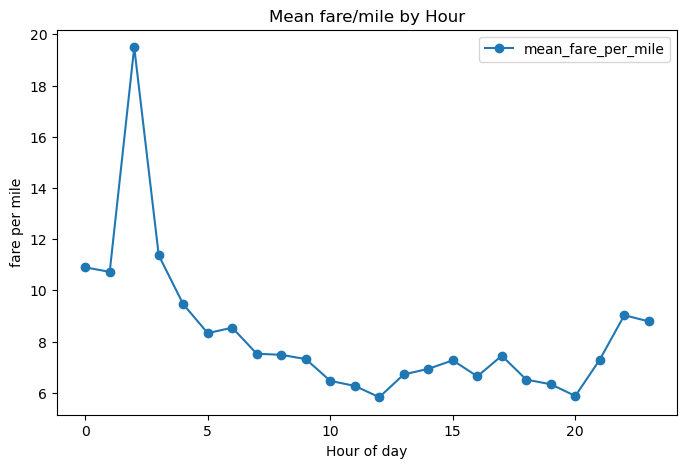

In [ ]:
hourly_trip = (df.groupby("hour")
                 .agg(n_trips=("Trip ID","size"),
                      mean_fare_per_mile=("fare_per_mile","mean"),
                      mean_mph=("mph","mean"))
                 .reset_index())

hourly_trip.plot(x="hour", y="n_trips", marker="o", title="Trips by Hour of Day")
plt.xlabel("Hour of day"); plt.ylabel("# trips")
plt.show()

hourly_trip.plot(x="hour", y="mean_fare_per_mile", marker="o",
                 title="Mean fare/mile by Hour")
plt.xlabel("Hour of day"); plt.ylabel("fare per mile")
plt.show()


          fare_per_mile                                     mph             \
                   mean    median        std   count       mean     median   
rush_hour                                                                    
0              7.123339  3.019324  94.617284  500948  22.792770  20.869565   
1              7.132954  3.981265  86.444987  223535  16.324289  13.045872   

                              
                 std   count  
rush_hour                     
0          12.625861  500948  
1           9.370154  223535  


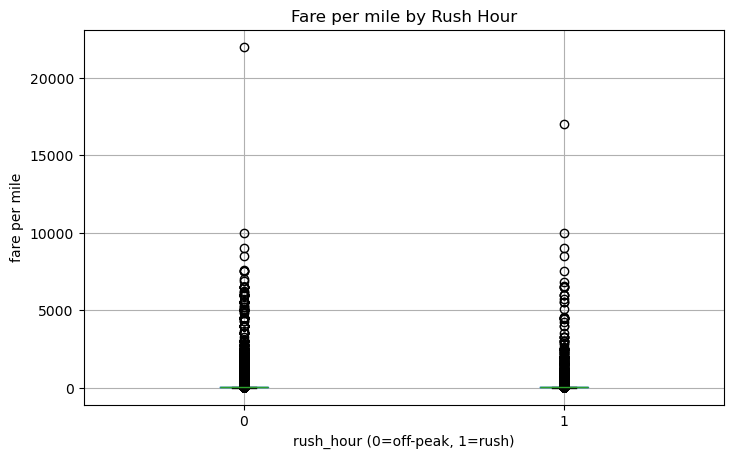

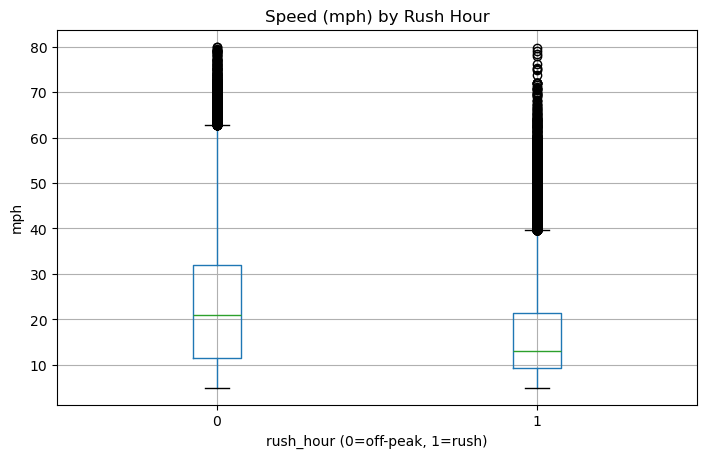

In [ ]:
summary_rush = (df.groupby("rush_hour")[["fare_per_mile","mph"]]
                  .agg(["mean","median","std","count"]))
print(summary_rush)

df.boxplot(column="fare_per_mile", by="rush_hour")
plt.title("Fare per mile by Rush Hour")
plt.suptitle("")
plt.xlabel("rush_hour (0=off-peak, 1=rush)")
plt.ylabel("fare per mile")
plt.show()

df.boxplot(column="mph", by="rush_hour")
plt.title("Speed (mph) by Rush Hour")
plt.suptitle("")
plt.xlabel("rush_hour (0=off-peak, 1=rush)")
plt.ylabel("mph")
plt.show()

99% quantile fare_per_mile: 21.66749539594867


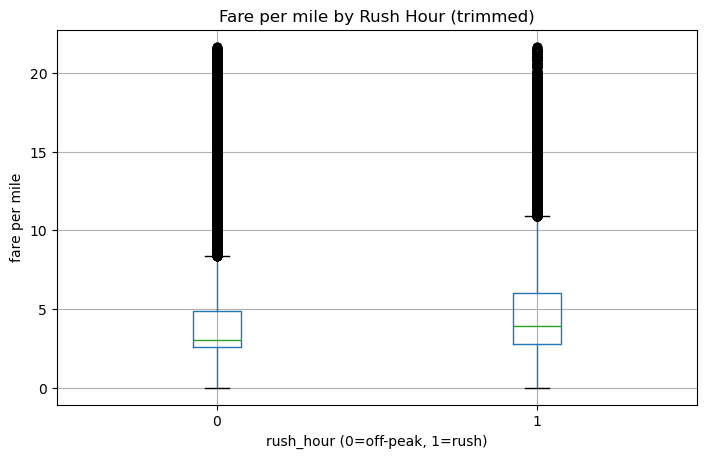

In [ ]:
df["fare_per_mile"].describe(percentiles=[.5, .9, .95, .99])
df["mph"].describe(percentiles=[.5, .9, .95, .99])

df = df[(df["mph"] > 0) & (df["mph"] <= 80)]

q99_fpm = df["fare_per_mile"].quantile(0.99)
print("99% quantile fare_per_mile:", q99_fpm)

cap_fpm = min(q99_fpm, 50)
df = df[df["fare_per_mile"] <= cap_fpm]

df.boxplot(column="fare_per_mile", by="rush_hour")
plt.title("Fare per mile by Rush Hour (trimmed)")
plt.suptitle("")
plt.xlabel("rush_hour (0=off-peak, 1=rush)")
plt.ylabel("fare per mile")
plt.show()


  rush_hour airport_trip fare_per_mile                mph        
                                  mean   count       mean   count
0         0            0      8.312721  333803  17.757063  333803
1         0            1      4.748039  167145  32.849513  167145
2         1            0      7.522314  172603  13.720575  172603
3         1            1      5.813458   50932  25.147993   50932


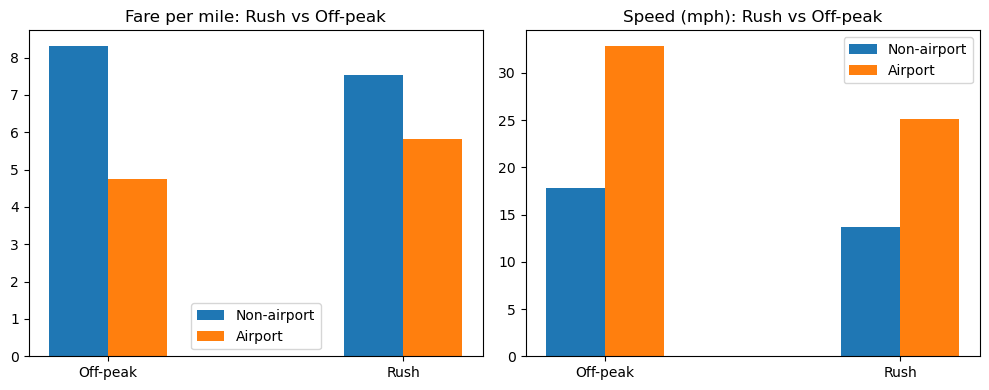

In [ ]:
tab = (df
       .groupby(["rush_hour","airport_trip"])[["fare_per_mile","mph"]]
       .agg(["mean","count"])
       .reset_index())
print(tab)

fig, ax = plt.subplots(1, 2, figsize=(10,4))

# fare per mile
for a in [0,1]:
    sub = df[df["airport_trip"]==a]
    label = "Non-airport" if a==0 else "Airport"
    means = sub.groupby("rush_hour")["fare_per_mile"].mean()
    ax[0].bar([0+0.2*a,1+0.2*a], means, width=0.2, label=label)
ax[0].set_xticks([0.1,1.1])
ax[0].set_xticklabels(["Off-peak","Rush"])
ax[0].set_title("Fare per mile: Rush vs Off-peak")
ax[0].legend()

# mph
for a in [0,1]:
    sub = df[df["airport_trip"]==a]
    label = "Non-airport" if a==0 else "Airport"
    means = sub.groupby("rush_hour")["mph"].mean()
    ax[1].bar([0+0.2*a,1+0.2*a], means, width=0.2, label=label)
ax[1].set_xticks([0.1,1.1])
ax[1].set_xticklabels(["Off-peak","Rush"])
ax[1].set_title("Speed (mph): Rush vs Off-peak")
ax[1].legend()

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import statsmodels.formula.api as smf

df_reg = df.dropna(subset=["fare_per_mile", "rush_hour"]).copy()

formula = """
fare_per_mile ~ rush_hour
               + miles
               + airport_trip
               + C(dow)
               + C(hour)
"""

mod2 = smf.ols(formula, data=df_reg).fit(cov_type="HC1")

print(mod2.summary().tables[1])

                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.6585      0.020    276.991      0.000       5.618       5.699
C(dow)[T.1]       0.1039      0.008     13.004      0.000       0.088       0.120
C(dow)[T.2]       0.1210      0.008     15.413      0.000       0.106       0.136
C(dow)[T.3]       0.1040      0.008     13.327      0.000       0.089       0.119
C(dow)[T.4]       0.0857      0.009     10.051      0.000       0.069       0.102
C(dow)[T.5]       0.0920      0.010      8.959      0.000       0.072       0.112
C(dow)[T.6]       0.0117      0.010      1.212      0.225      -0.007       0.031
C(hour)[T.1]      0.0931      0.033      2.857      0.004       0.029       0.157
C(hour)[T.2]      0.0353      0.042      0.850      0.395      -0.046       0.117
C(hour)[T.3]      0.0747      0.045      1.663      0.096      -0.013       0.163
C(hour)[T.4]    

We estimate a linear regression of fare per mile on a rush-hour indicator, controlling for trip distance, whether the trip involves an airport, and fixed effects for day of week and hour of day. The coefficient on rush_hour is 0.214 (p < 0.001), meaning that, holding distance, airport status, weekday and hour constant, trips that occur during rush hour are on average about $0.21 more expensive per mile than comparable off-peak trips. This provides evidence of a positive “rush-hour premium” in per-mile pricing.

The coefficient on miles is –0.209 (p < 0.001), indicating that longer trips have lower fares per mile, consistent with fixed components such as base fare and fees being spread over a greater distance. The coefficient on airport_trip is –0.074 (p < 0.001), suggesting that, after controlling for time and distance, airport trips are slightly cheaper per mile than non-airport trips, possibly reflecting specific pricing rules on airport routes. Overall, the results support the view that rush-hour timing has a meaningful and statistically significant impact on per-mile taxi fares.